# Train script for CNN VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
import torch

import sys
sys.path.append("../Modules")
sys.path.append("../ToyDatasets")

# local imports
from train import train
from helpers import kl_loss,nll_loss,mse_loss,kl_loss_multi
from models import CNNVAE
from timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 256
num_steps = 16
dataset_size = 5000
num_classes = 10

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)
valid_data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)
valid_batch_loader = iter(valid_data_loader)

## Define model

In [3]:
model = CNNVAE(input_size=1,conv_size=256,latent_size=64,output_size=num_classes,use_softmax=True)
print("Number of trainable parameters {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# test forward pass
try:
    initial_batch = batch_loader.next()
    x = Variable(initial_batch).type(torch.FloatTensor).transpose(1,0)
    test,_ = model(x)
    assert (test.shape[0] == x.shape[0] and test.shape[1] == x.shape[1] and test.shape[2] == num_classes)
    print("Forward pass succesfull")
except:
    print("Error in forward pass. Output should have shape: {} but had {}".format(x.contiguous().view(-1).shape,test.view(-1).shape))

Number of trainable parameters 557578
Forward pass succesfull


## Define optimizer and loss

In [4]:
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.5,verbose=True,cooldown=5)

## Run trainer


Train (100 10%) loss: 2.0486 r_loss: 2.0406 kl: 15.9131
Valid (100 10%) loss: 2.0508 r_loss: 2.0432 kl: 15.2364

Train (200 20%) loss: 1.4144 r_loss: 1.3833 kl: 62.1694
Valid (200 20%) loss: 1.4322 r_loss: 1.4010 kl: 62.4503

Train (300 30%) loss: 1.1524 r_loss: 1.1039 kl: 96.9864
Valid (300 30%) loss: 1.1354 r_loss: 1.0884 kl: 94.0274

Train (400 40%) loss: 0.8518 r_loss: 0.7762 kl: 151.1681
Valid (400 40%) loss: 0.8074 r_loss: 0.7352 kl: 144.4670

Train (500 50%) loss: 0.8773 r_loss: 0.6936 kl: 73.5046
Valid (500 50%) loss: 0.8731 r_loss: 0.6889 kl: 73.7032

Train (600 60%) loss: 0.9197 r_loss: 0.6921 kl: 50.5808
Valid (600 60%) loss: 0.9340 r_loss: 0.6921 kl: 53.7483

Train (700 70%) loss: 0.9818 r_loss: 0.7105 kl: 41.7369
Valid (700 70%) loss: 0.9778 r_loss: 0.6988 kl: 42.9236

Train (800 80%) loss: 1.0565 r_loss: 0.7526 kl: 35.7528
Valid (800 80%) loss: 1.0417 r_loss: 0.7400 kl: 35.4960

Train (900 90%) loss: 1.0849 r_loss: 0.7417 kl: 32.6898
Valid (900 90%) loss: 1.0561 r_loss: 

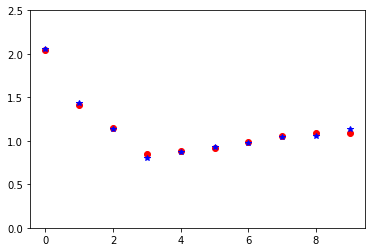

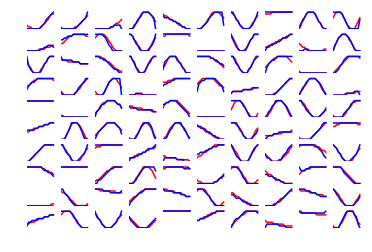

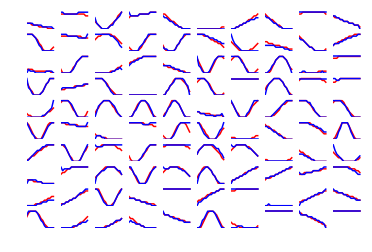

In [6]:
# use at least 50 iterations to get good results
train(data_loader,dataset_size,valid_batch_loader,model,optimizer,scheduler,nll_loss,kl_loss,n_iters=50,use_softmax=True,print_every=1)

In [8]:
#torch.save(model.state_dict(),"Saved_models/CNNVAE_nll.pt")